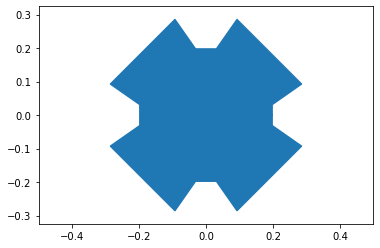

In [45]:
from matplotlib import pyplot as plt
import numpy as np
import math
import meep as mp
import cmath
size = 13
shape_size = 48
sx, sy, sz = 1, 1, 4
h = 1.25
dpml = 0.5
b_m, c_m = 1.4, 3.54
res = 25
echo = 1000
cell_size = mp.Vector3(sx,sy,sz)
fcen = 0.5
df = 0.2
theta = math.radians(0)
nfreq = 400

# k with correct length (plane of incidence: XZ) 
k = mp.Vector3(math.sin(theta),0,math.cos(theta)).scale(fcen)
def pw_amp(k, x0):
    def _pw_amp(x):
        return cmath.exp(1j * 2 * math.pi * k.dot(x + x0))
    return _pw_amp

coordinates = np.genfromtxt('../S4_code/data/DATA25_#13_sh.txt')
xc, yc = coordinates[:, 0], coordinates[:, 1]
xc = np.reshape(xc, (size, shape_size))
yc = np.reshape(yc, (size, shape_size))
i = 4
plt.axis('equal')
plt.ylim(-0.5, 0.5)
plt.xlim(-0.5, 0.5)
plt.plot(xc[i], yc[i])
plt.fill(xc[i], yc[i])
plt.show()

In [46]:
vertices = [mp.Vector3(xc[i][0],yc[9][0])]
for j in range(1, len(xc[i]) - 1):
    if xc[i][j] == xc[i][j - 1] and yc[i][j] == yc[i][j - 1]:
        continue
    vertices.append(mp.Vector3(xc[i][j], yc[i][j]))

In [47]:
geometry = [mp.Block(size = cell_size, material=mp.Medium(index=b_m)),
            mp.Prism(vertices, height=h, material=mp.Medium(index=c_m), center=mp.Vector3())]
pml_layers = [mp.PML(thickness= 1, direction = mp.Z, side=mp.High),
              mp.Absorber(thickness=1,direction = mp.Z, side=mp.Low)]

src_pos = -(sz/2 - dpml - 0.5)
src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                 component = mp.Ey,
                 center = mp.Vector3(0,0,src_pos),
                 size = mp.Vector3(sx,sy,0),
                 amp_func=pw_amp(k,mp.Vector3(0,0,src_pos))
               )]

sim = mp.Simulation(resolution=res,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=src,
                    geometry=geometry,
                    k_point=k
                   )

freg = mp.FluxRegion(center=mp.Vector3(0,0,-src_pos),
                     size = mp.Vector3(sx,sy,0)
                    )

trans = sim.add_flux(fcen, df, nfreq, freg)

In [40]:
sim.init_sim()

eps_data = sim.get_epsilon()

from mayavi import mlab
s = mlab.contour3d(eps_data, colormap="YlGnBu")
mlab.show()

-----------
Initializing structure...
Meep: using complex fields.


In [48]:
sim.run(until = echo)
bend = mp.get_fluxes(trans)

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 2.1/1000.0 = 0.2% done in 4.0s, 1911.8s to go
Meep progress: 4.46/1000.0 = 0.4% done in 8.0s, 1793.9s to go
Meep progress: 6.84/1000.0 = 0.7% done in 12.1s, 1749.7s to go
Meep progress: 9.22/1000.0 = 0.9% done in 16.1s, 1726.3s to go
Meep progress: 11.58/1000.0 = 1.2% done in 20.1s, 1713.3s to go
Meep progress: 13.9/1000.0 = 1.4% done in 24.1s, 1709.9s to go
Meep progress: 16.1/1000.0 = 1.6% done in 28.1s, 1719.3s to go
Meep progress: 18.02/1000.0 = 1.8% done in 32.1s, 1751.8s to go
Meep progress: 20.16/1000.0 = 2.0% done in 36.2s, 1757.2s to go
Meep progress: 21.740000000000002/1000.0 = 2.2% done in 40.2s, 1810.5s to go
Meep progress: 22.6/1000.0 = 2.3% done in 44.2s, 1913.0s to go
Meep progress: 23.98/1000.0 = 2.4% done in 48.3s, 1964.2s to go
Meep progress: 25.8/1000.0 = 2.6% done in 52.3s, 1974.0s to go
Meep progress: 27.22/1000.0 = 2.7% done in 56.3s, 2011.7s to go
Meep progress: 28.8/1000.0 = 2.9% do

Meep progress: 269.24/1000.0 = 26.9% done in 486.4s, 1320.2s to go
Meep progress: 271.48/1000.0 = 27.1% done in 490.4s, 1316.1s to go
Meep progress: 273.8/1000.0 = 27.4% done in 494.4s, 1311.4s to go
Meep progress: 276.12/1000.0 = 27.6% done in 498.5s, 1306.8s to go
Meep progress: 278.44/1000.0 = 27.8% done in 502.5s, 1302.2s to go
Meep progress: 280.76/1000.0 = 28.1% done in 506.5s, 1297.6s to go
Meep progress: 283.06/1000.0 = 28.3% done in 510.5s, 1293.1s to go
Meep progress: 285.38/1000.0 = 28.5% done in 514.5s, 1288.4s to go
Meep progress: 287.7/1000.0 = 28.8% done in 518.5s, 1283.8s to go
Meep progress: 290.0/1000.0 = 29.0% done in 522.5s, 1279.3s to go
Meep progress: 292.3/1000.0 = 29.2% done in 526.5s, 1274.8s to go
Meep progress: 294.62/1000.0 = 29.5% done in 530.5s, 1270.2s to go
Meep progress: 296.94/1000.0 = 29.7% done in 534.5s, 1265.6s to go
Meep progress: 299.26/1000.0 = 29.9% done in 538.6s, 1261.1s to go
Meep progress: 301.54/1000.0 = 30.2% done in 542.6s, 1256.8s to go

Meep progress: 543.76/1000.0 = 54.4% done in 972.5s, 816.0s to go
Meep progress: 546.02/1000.0 = 54.6% done in 976.5s, 811.9s to go
Meep progress: 548.34/1000.0 = 54.8% done in 980.5s, 807.7s to go
Meep progress: 550.58/1000.0 = 55.1% done in 984.5s, 803.6s to go
Meep progress: 552.88/1000.0 = 55.3% done in 988.6s, 799.5s to go
Meep progress: 555.2/1000.0 = 55.5% done in 992.6s, 795.2s to go
Meep progress: 557.54/1000.0 = 55.8% done in 996.6s, 790.9s to go
Meep progress: 559.88/1000.0 = 56.0% done in 1000.6s, 786.6s to go
Meep progress: 562.22/1000.0 = 56.2% done in 1004.6s, 782.3s to go
Meep progress: 564.52/1000.0 = 56.5% done in 1008.7s, 778.1s to go
Meep progress: 566.74/1000.0 = 56.7% done in 1012.7s, 774.2s to go
Meep progress: 569.0600000000001/1000.0 = 56.9% done in 1016.7s, 769.9s to go
Meep progress: 571.14/1000.0 = 57.1% done in 1020.7s, 766.5s to go
Meep progress: 573.46/1000.0 = 57.3% done in 1024.8s, 762.2s to go
Meep progress: 575.74/1000.0 = 57.6% done in 1028.8s, 758.1

Meep progress: 821.3000000000001/1000.0 = 82.1% done in 1458.6s, 317.4s to go
Meep progress: 823.64/1000.0 = 82.4% done in 1462.6s, 313.2s to go
Meep progress: 826.0/1000.0 = 82.6% done in 1466.7s, 309.0s to go
Meep progress: 828.34/1000.0 = 82.8% done in 1470.7s, 304.8s to go
Meep progress: 830.6800000000001/1000.0 = 83.1% done in 1474.7s, 300.6s to go
Meep progress: 833.04/1000.0 = 83.3% done in 1478.7s, 296.4s to go
Meep progress: 835.4/1000.0 = 83.5% done in 1482.7s, 292.1s to go
Meep progress: 837.74/1000.0 = 83.8% done in 1486.8s, 288.0s to go
Meep progress: 840.0600000000001/1000.0 = 84.0% done in 1490.8s, 283.8s to go
Meep progress: 842.4/1000.0 = 84.2% done in 1494.8s, 279.6s to go
Meep progress: 844.76/1000.0 = 84.5% done in 1498.8s, 275.4s to go
Meep progress: 847.1/1000.0 = 84.7% done in 1502.8s, 271.3s to go
Meep progress: 849.4200000000001/1000.0 = 84.9% done in 1506.8s, 267.1s to go
Meep progress: 851.78/1000.0 = 85.2% done in 1510.8s, 262.9s to go
Meep progress: 854.0/1

In [49]:
sim.reset_meep()

geometry = [mp.Block(size = cell_size, material=mp.Medium(index=b_m))]
pml_layers = [mp.PML(thickness= 1, direction = mp.Z, side=mp.High),
              mp.Absorber(thickness=1,direction = mp.Z, side=mp.Low)]
src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                 component = mp.Ey,
                 center = mp.Vector3(0,0,src_pos),
                 size = mp.Vector3(sx,sy,0),
                 amp_func=pw_amp(k,mp.Vector3(0,0,src_pos))
               )]
sim = mp.Simulation(resolution=res,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=src,
                    geometry=geometry,
                    k_point=k
                   )
freg = mp.FluxRegion(center=mp.Vector3(0,0,-src_pos),
                     size = mp.Vector3(sx,sy,0)
                    )
trans = sim.add_flux(fcen, df, nfreq, freg)

In [50]:
sim.run(until = echo)
straight = mp.get_fluxes(trans)
flux_freqs = mp.get_flux_freqs(trans)

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 2.1/1000.0 = 0.2% done in 4.0s, 1910.5s to go
Meep progress: 4.42/1000.0 = 0.4% done in 8.0s, 1810.4s to go
Meep progress: 6.76/1000.0 = 0.7% done in 12.1s, 1771.0s to go
Meep progress: 9.120000000000001/1000.0 = 0.9% done in 16.1s, 1747.6s to go
Meep progress: 11.48/1000.0 = 1.1% done in 20.1s, 1730.8s to go
Meep progress: 13.8/1000.0 = 1.4% done in 24.1s, 1722.6s to go
Meep progress: 16.12/1000.0 = 1.6% done in 28.1s, 1715.9s to go
Meep progress: 18.5/1000.0 = 1.9% done in 32.1s, 1704.8s to go
Meep progress: 20.86/1000.0 = 2.1% done in 36.1s, 1696.0s to go
Meep progress: 23.240000000000002/1000.0 = 2.3% done in 40.1s, 1687.4s to go
Meep progress: 25.580000000000002/1000.0 = 2.6% done in 44.2s, 1682.7s to go
Meep progress: 27.94/1000.0 = 2.8% done in 48.2s, 1677.1s to go
Meep progress: 30.22/1000.0 = 3.0% done in 52.2s, 1675.3s to go
Meep progress: 32.56/1000.0 = 3.3% done in 56.2s, 1670.0s to go
Meep pro

Meep progress: 274.7/1000.0 = 27.5% done in 486.2s, 1283.6s to go
Meep progress: 276.84000000000003/1000.0 = 27.7% done in 490.2s, 1280.4s to go
Meep progress: 279.1/1000.0 = 27.9% done in 494.2s, 1276.5s to go
Meep progress: 281.38/1000.0 = 28.1% done in 498.2s, 1272.4s to go
Meep progress: 283.64/1000.0 = 28.4% done in 502.2s, 1268.4s to go
Meep progress: 285.90000000000003/1000.0 = 28.6% done in 506.2s, 1264.5s to go
Meep progress: 288.16/1000.0 = 28.8% done in 510.3s, 1260.5s to go
Meep progress: 290.46/1000.0 = 29.0% done in 514.3s, 1256.3s to go
Meep progress: 292.82/1000.0 = 29.3% done in 518.3s, 1251.8s to go
Meep progress: 295.12/1000.0 = 29.5% done in 522.4s, 1247.6s to go
Meep progress: 297.44/1000.0 = 29.7% done in 526.4s, 1243.3s to go
Meep progress: 299.76/1000.0 = 30.0% done in 530.4s, 1239.0s to go
Meep progress: 302.1/1000.0 = 30.2% done in 534.4s, 1234.6s to go
Meep progress: 304.42/1000.0 = 30.4% done in 538.4s, 1230.3s to go
Meep progress: 306.72/1000.0 = 30.7% done

Meep progress: 548.82/1000.0 = 54.9% done in 968.4s, 796.1s to go
Meep progress: 550.88/1000.0 = 55.1% done in 972.4s, 792.8s to go
Meep progress: 553.12/1000.0 = 55.3% done in 976.5s, 788.9s to go
Meep progress: 555.34/1000.0 = 55.5% done in 980.5s, 785.1s to go
Meep progress: 557.58/1000.0 = 55.8% done in 984.5s, 781.1s to go
Meep progress: 559.86/1000.0 = 56.0% done in 988.5s, 777.1s to go
Meep progress: 562.12/1000.0 = 56.2% done in 992.5s, 773.1s to go
Meep progress: 564.38/1000.0 = 56.4% done in 996.5s, 769.2s to go
Meep progress: 566.6800000000001/1000.0 = 56.7% done in 1000.5s, 765.1s to go
Meep progress: 569.02/1000.0 = 56.9% done in 1004.6s, 760.9s to go
Meep progress: 571.36/1000.0 = 57.1% done in 1008.6s, 756.6s to go
Meep progress: 573.66/1000.0 = 57.4% done in 1012.6s, 752.6s to go
Meep progress: 575.9/1000.0 = 57.6% done in 1016.6s, 748.7s to go
Meep progress: 578.1800000000001/1000.0 = 57.8% done in 1020.6s, 744.6s to go
Meep progress: 580.24/1000.0 = 58.0% done in 1024

Meep progress: 821.84/1000.0 = 82.2% done in 1450.5s, 314.4s to go
Meep progress: 823.88/1000.0 = 82.4% done in 1454.5s, 310.9s to go
Meep progress: 826.16/1000.0 = 82.6% done in 1458.5s, 306.9s to go
Meep progress: 828.44/1000.0 = 82.8% done in 1462.5s, 302.9s to go
Meep progress: 830.76/1000.0 = 83.1% done in 1466.5s, 298.7s to go
Meep progress: 833.0600000000001/1000.0 = 83.3% done in 1470.5s, 294.7s to go
Meep progress: 835.14/1000.0 = 83.5% done in 1474.5s, 291.1s to go
Meep progress: 837.4/1000.0 = 83.7% done in 1478.6s, 287.1s to go
Meep progress: 839.62/1000.0 = 84.0% done in 1482.6s, 283.2s to go
Meep progress: 841.9200000000001/1000.0 = 84.2% done in 1486.6s, 279.1s to go
Meep progress: 844.1800000000001/1000.0 = 84.4% done in 1490.6s, 275.1s to go
Meep progress: 846.48/1000.0 = 84.6% done in 1494.6s, 271.1s to go
Meep progress: 848.8000000000001/1000.0 = 84.9% done in 1498.7s, 267.0s to go
Meep progress: 851.1/1000.0 = 85.1% done in 1502.7s, 262.9s to go
Meep progress: 853.3

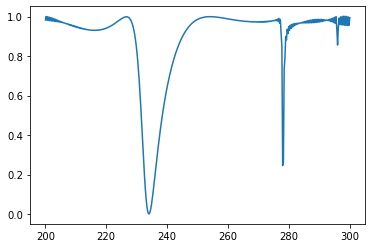

In [51]:
import matplotlib.pyplot as plt
c = 300
p = 0.6
Ts = []
wl = []
for i in range(nfreq):
    wl = np.append(wl, flux_freqs[i])
    Ts = np.append(Ts, bend[i]/straight[i])
plt.figure()
#plt.ylim(0,1)
plt.plot(np.multiply(wl, c/p),Ts)